<a href="https://colab.research.google.com/github/ManasviEmmadi/ML_AI_Projects/blob/main/Sentiment_Analysis_Amazon_Alexa_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dataset**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
# /content/drive/MyDrive/ML/Datasets/amazon_alexa.tsv -- substitute this in adress later
df=pd.read_table('/content/amazon_alexa.tsv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [ ]:
df.shape

(3150, 5)

**Preprocessing data**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')

In [ ]:
len(stop_words)

179

In [ ]:
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for negative_word in negative_words:
  stop_words.remove(negative_word)

len(stop_words)

160

In [ ]:
import re             # re -> regular expressions
REPLACE_BY_SPACE_RE = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(sample):
  sample = sample.lower()
  sample = sample.replace("<br /><br />", "")
  sample = REPLACE_BY_SPACE_RE.sub(' ', sample)
  sample = re.sub("[^a-z]+", " ", sample)
  sample = sample.split(" ")
  sample = [word for word in sample if word not in stop_words ]
  sample = " ".join(sample)
  return sample


In [ ]:
df['verified_reviews'] = df['verified_reviews'].apply(clean_text)
conditions = [
    (df['rating'] >= 4),
    (df['rating'] == 3),
    (df['rating'] <= 2)
    ]
values = ['Positive', 'Neutral', 'Negative']
df['sentiment'] = np.select(conditions, values)
df.head()

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,love echo,1,Positive
1,5,31-Jul-18,Charcoal Fabric,loved,1,Positive
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,Positive
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...,1,Positive
4,5,31-Jul-18,Charcoal Fabric,music,1,Positive


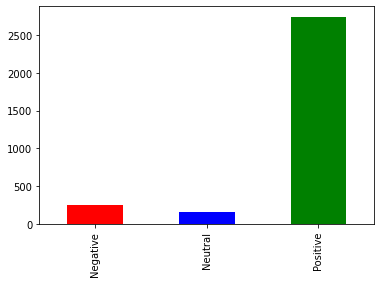

In [ ]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])

**Splitting the Dataset**

In [ ]:
x = df['verified_reviews'].values
y = df['sentiment'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [ ]:
np.unique(y_train,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 205,  122, 2193]))

In [ ]:
np.unique(y_test,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 52,  30, 548]))

**Pipeline**

*   Vectorization using TFIDF Vectorizer
*   Calling SVM Algorithm

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())])

In [ ]:
text_model.fit(x_train,y_train)
y_pred = text_model.predict(x_test)
np.unique(y_pred,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 11,   8, 611]))

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)*100

90.0

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 11,   0,   0],
       [  0,   8,   0],
       [ 41,  22, 548]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.21      1.00      0.35        11
     Neutral       0.27      1.00      0.42         8
    Positive       1.00      0.90      0.95       611

    accuracy                           0.90       630
   macro avg       0.49      0.97      0.57       630
weighted avg       0.98      0.90      0.93       630



In [ ]:
text_model.predict(['This product is amazing!'])

array(['Positive'], dtype=object)

In [ ]:
import joblib
joblib.dump(text_model,'Sentiment_Analyser')

['Sentiment_Analyser']

**Create Web App**

In [ ]:
# !./ngrok authtokens 2IqUGzxbebXPUf87r3fveipftWV_6d5JWcFDroFaFC4akdeAp

In [ ]:
# !ls ngrok

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 9.2 MB 5.2 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 164 kB 48.8 MB/s 
     |████████████████████████████████| 182 kB 47.3 MB/s 
     |████████████████████████████████| 4.7 MB 54.2 MB/s 
     |████████████████████████████████| 237 kB 61.6 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 51 kB 6.2 MB/s 


In [ ]:
!ngrok authtoken 2IqUGzxbebXPUf87r3fveipftWV_6d5JWcFDroFaFC4akdeAp

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pip install htbuilder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for htbuilder: filename=htbuilder-0.6.1-py3-none-any.whl size=12458 sha256=91f1364ceb261fe2de166b7af01e7462607ad320c7e90298746d02c6d543c107
  Stored in directory: /root/.cache/pip/wheels/35/b2/79/38294ef56a2080e398b0647d40e3e5a9a2d0064bce33896d98
Successfully built htbuilder


In [ ]:
%%writefile app.py
import streamlit as st
import sklearn
import joblib
from htbuilder import HtmlElement, div, ul, li, br, hr, a, p, img, styles, classes, fonts
from htbuilder.units import percent, px
from htbuilder.funcs import rgba, rgb

model = joblib.load('Sentiment_Analyser')
st.title('Sentiment Analyser')
ip = st.text_input('Enter your review: ')
op = model.predict([ip])
ans=op[0]
if st.button('Predict'):
  if ans == 'Positive':
      st.success("Positive :)")
  elif ans == 'Negative':
      st.error("Negative :(")
  elif ans== 'Neutral':
      st.warning("Neutral :|")

def layout(*args):

    style = """
    <style>
      footer {visibility: hidden;}
     .stApp { bottom: 105px; }
    </style>
    """

    style_div = styles(
        position="fixed",
        left=0,
        bottom=0,
        margin=px(0, 0, 0, 0),
        width=percent(100),
        color="black",
        text_align="center",
        height="auto",
        opacity=1
    )

    style_hr = styles(
        display="block",
        margin=px(8, 8, "auto", "auto"),
        border_style="inset",
        border_width=px(2)
    )

    body = p()
    foot = div(
        style=style_div
    )(
        hr(
            style=style_hr
        ),
        body
    )

    st.markdown(style, unsafe_allow_html=True)

    for arg in args:
        if isinstance(arg, str):
            body(arg)

        elif isinstance(arg, HtmlElement):
            body(arg)

    st.markdown(str(foot), unsafe_allow_html=True)



myargs = [
        "Analyzes the sentiment of input phrases"
    ]
layout(*myargs)

Writing app.py


In [ ]:
# st run app.py

In [ ]:
# can include the part about what it is exactly doing with a few links


In [ ]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://1ff9-35-202-226-243.ngrok.io'

In [ ]:
!pip install pipreqs --quiet

In [ ]:
!pipreqs /content

INFO: Successfully saved requirements file in /content/requirements.txt
